# Explorotory Data Analysis on Shopee Shipping Order Data
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## DATA WRANGLING
---

Import the dataset

In [ ]:
df = pd.read_excel('Order-shipped202112310927.xlsx')
df.head()

In [ ]:
print(df.shape)
df.info()

The dataframe can be purged of any and all non-essential datasets

In [ ]:
# remove all unncessary columns
x=list(range(0,6)) + list(range(9,20)) + [32,38,46,47]
col = [i for i in list(range(len(df.columns))) if i not in col]
df = df.iloc[:,col]

# remove all empty columns
df = df.dropna(axis=1,how='all')

# convert all the dates to pandas datetime
df['Order Created Time'] = pd.to_datetime(df['Order Created Time'],infer_datetime_format=True)
df['Order Paid Time'] = pd.to_datetime(df['Order Paid Time'],infer_datetime_format=True)
df['Order Shipped Time'] = pd.to_datetime(df['Order Shipped Time'],infer_datetime_format=True)

# save clean data to csv file
df.to_csv('Clean_Order-shipped202112310927.csv')

There apppears null values within the column `Order Paid Time` and further investigation shows that these orders are COD and thus payments were made directly to the shipping company

---
## Data Viz

### Perodua Plate Daily Quantity Prediction

In [129]:
df = pd.read_csv('Clean_Order_Shipped.csv',index_col=0)
# convert all the dates to pandas datetime
df['Order Created Time'] = pd.to_datetime(df['Order Created Time'],infer_datetime_format=True)
df['Order Paid Time'] = pd.to_datetime(df['Order Paid Time'],infer_datetime_format=True)
df['Order Shipped Time'] = pd.to_datetime(df['Order Shipped Time'],infer_datetime_format=True)

In [130]:
# create a df of all the perodua plates sold
perodua = df[df['Variation Name'] == 'Perodua'].reset_index(drop=True)
# create a column for the month and days
perodua['DayofYear'] = perodua['Order Created Time'].dt.dayofyear
perodua['Month'] = perodua['Order Created Time'].dt.month
perodua['Day'] = perodua['Order Created Time'].dt.day

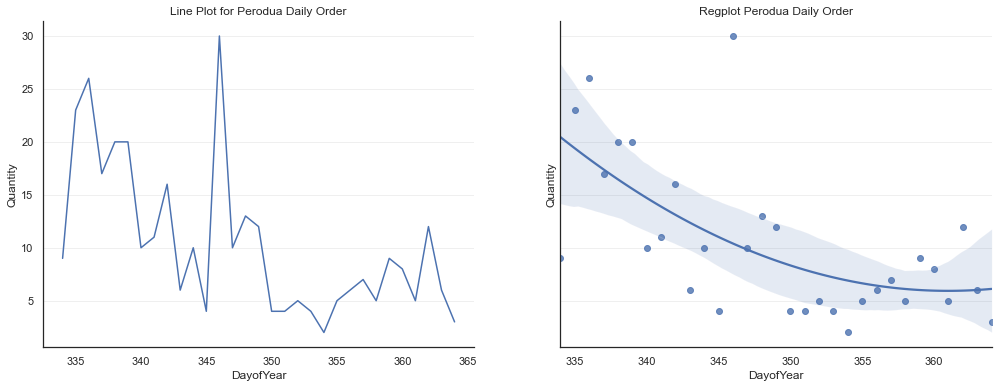

In [131]:
# Visualize the regression line for the perodua daily order for December 2021
scat_df = perodua.groupby('DayofYear',as_index=False)['Quantity'].sum()

# create canvas
fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(17,6),sharey=True)

# set the style and theme
sns.set_theme('notebook')
sns.set_style('whitegrid')

# plot the graph
sns.lineplot(data=scat_df,y='Quantity',x='DayofYear',ax=ax0)
sns.regplot(data=scat_df,x='DayofYear',y='Quantity',order=2,ax=ax1)

ax0.set_title('Line Plot for Perodua Daily Order')
ax1.set_title('Regplot Perodua Daily Order')
ax0.grid(axis='y',alpha=0.3)
ax1.grid(axis='y',alpha=0.3)
sns.despine()

plt.show()

**CONCLUSION**: <font color='red'> From the plots we can observe a downward slope which indicates that the perodua car plate sales order for the month of December 2021 is not enough to create a regression plot with. As such we will instead look at the total number of all perodua car plate orders </font>

In [132]:
# table of all the carplate sold by
order_list = df.groupby(['SKU','Variation Name'])[['Quantity']].sum()
order_list.filter(like='Road Tax',axis=0)

Quantity
SKU                 Variation Name              
Islamik Road Tax    Bismillah                 80
                    Doa Naik Kenderaan       255
                    Istighfar                 19
                    Selawat                   56
                    Shahadah RoadTax          62
                    Zikir                     58
Road Tax Holder     Arsenal                    9
                    Audi                       3
                    BMW                        7
                    Chelsea                    3
                    Ferrari                    1
                    Ford                      12
                    Ford Raptor                1
                    Honda                    113
                    Honda City                45
                    Honda Civic               17
                    Hyundai                   13
                    Kia                        9
                    Lamborghini                1
                    Lexus                      1
                    Liverpool                 21
                    Manchester United         25
                    Mazda                      7
                    Mercedes Benz             12
                    Mini                       1
                    Mitsubishi                23
                    NO LOGO SET              275
                    Nissan                    52
                    Perodua                  322
                    Perodua Alza              75
                    Perodua Axia              90
                    Perodua Bezza             76
                    Perodua Myvi             191
                    Porsche                    3
                    Proton                   192
                    Proton Persona            32
                    Proton Saga               91
                    Proton Savvy               1
                    Range Rover                3
                    Subaru                     4
                    Suzuki                     5
                    Tesla                      1
                    Toyota                   108
                    Toyota Hilux              21
                    Toyota Vios               52
                    Volkswagen                 3
                    Volvo                      3
Super Hero Road Tax Avengers                   6
                    Batman                    11
                    Ironman                    2
                    Spider-man                 4
                    Superman                   6
                    The Flash                  3
                    Thor                       1
                    Wonder Woman               6

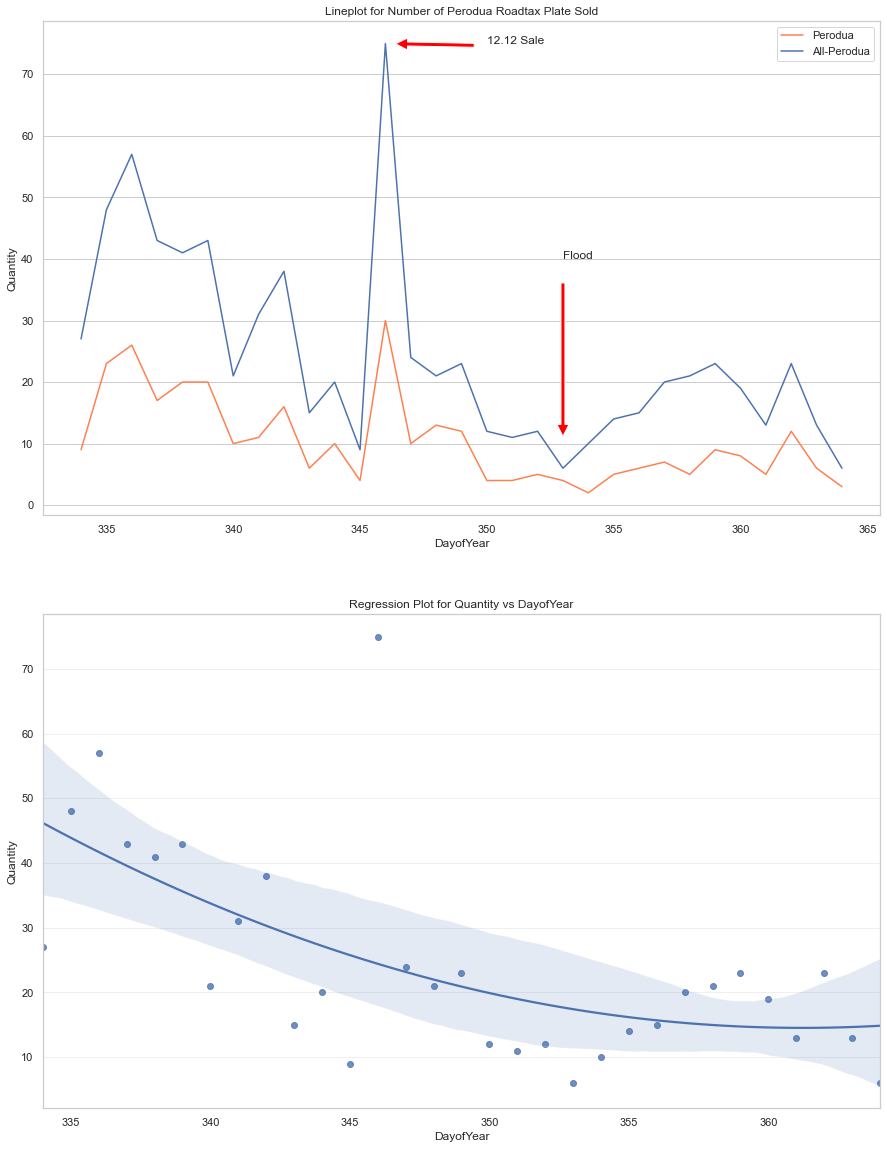

In [138]:
# create a list of all perodua plate name
all_perodua_list = list(order_list.filter(like='Perodua',axis=0).reset_index()['Variation Name'])
# create a df of the perodua list
all_perodua = df[df['Variation Name'].isin(all_perodua_list)].reset_index(drop=True)
# add day of year to df
all_perodua['DayofYear'] = all_perodua['Order Created Time'].dt.dayofyear
# group by day to plot
pdf = all_perodua.groupby('DayofYear',as_index=False)['Quantity'].sum()

# create the canvas
fig, (ax0,ax1) = plt.subplots(nrows=2,figsize=(15,20))

# plot the graphs
sns.lineplot(data=scat_df,x='DayofYear',y='Quantity',color='coral',ax=ax0)
sns.lineplot(data=pdf,x='DayofYear',y='Quantity',ax=ax0)
sns.regplot(data=pdf,x='DayofYear',y='Quantity',order=2,ax=ax1)

# annotate the plot
ax0.annotate('12.12 Sale', xy=(346,75), xytext=(350,75),arrowprops={'facecolor':'red','shrink':0.1})
ax0.annotate('Flood', xy=(353,8), xytext=(353,40),arrowprops={'facecolor':'red','shrink':0.1})

# label the plots
ax0.set_title('Lineplot for Number of Perodua Roadtax Plate Sold')
ax1.set_title('Regression Plot for Quantity vs DayofYear')
ax0.legend(labels=['Perodua','All-Perodua'])
ax0.grid(axis='x',alpha=0.3)
ax1.grid(axis='y',alpha=0.3)
ax1.grid()

plt.savefig('RTH_Reg_Plot.png',dpi=600,bbox_inches='tight')
plt.show()

**CONCLUSION:** <font color='red'> The order number for all Perodua carplates shows similar trend to the previous plots. Next we will move on to the entire car plate catalogue 

### Order Distribution by Hour of the Day

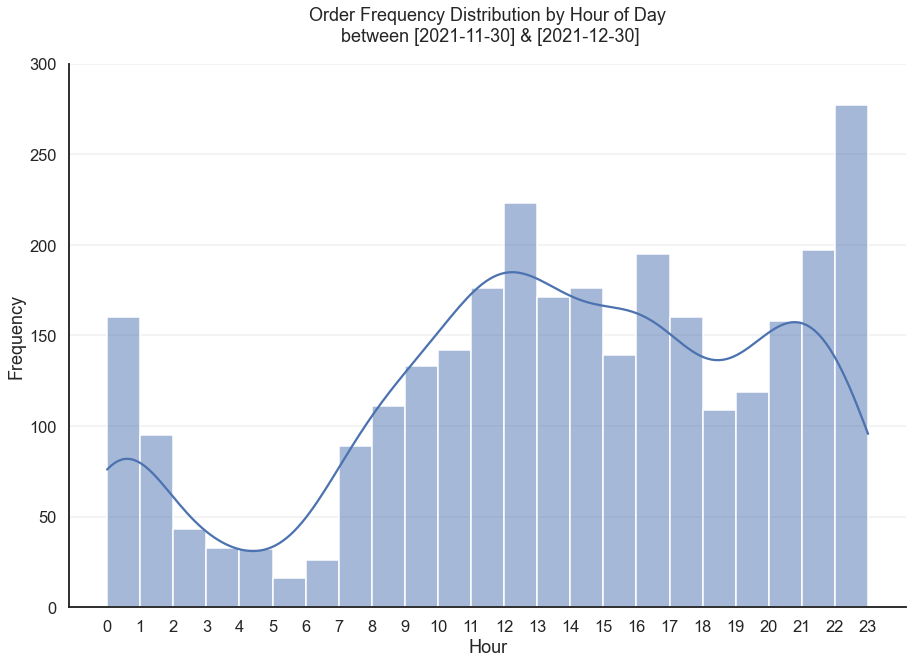

In [144]:
# create df for the distribution plot
df['Hour'] = df['Order Created Time'].dt.hour

# create the canvas
fig , ax0 = plt.subplots(figsize=(15,10))

# set the style and theme
sns.set_theme('talk')
sns.set_style('white')

# plot the histogram
sns.histplot(data=df, 
             x='Hour',
             kde=True,
             stat='frequency',
             #discrete=True,
             bins = range(0,24),
             ax=ax0)

# label the plots
sns.despine()
ax0.set_title(f'Order Frequency Distribution by Hour of Day\n between [2021-11-30] & [2021-12-30]',y=1.03)
ax0.set_ylim(0,300)
ax0.set_xticks(ticks=range(0,24)) # add xtick labels for each hour of the day
ax0.grid(axis='y',alpha=0.3)

plt.savefig('Order_Frequency_HourofDay.png',dpi=600,bbox_inches='tight')
plt.show()

### Car Plate Quantity Distribution

In [109]:
freq/freq.sum()

array([0.87383613, 0.10148976, 0.01862197, 0.00605214])

In [97]:
# create dataframe
rt_df = df[['SKU','Variation Name','Quantity']]
rt_df = rt_df[rt_df['SKU'].isin(['Islamik Road Tax','Road Tax Holder','Super Hero Road Tax'])] # filter only the roadtax

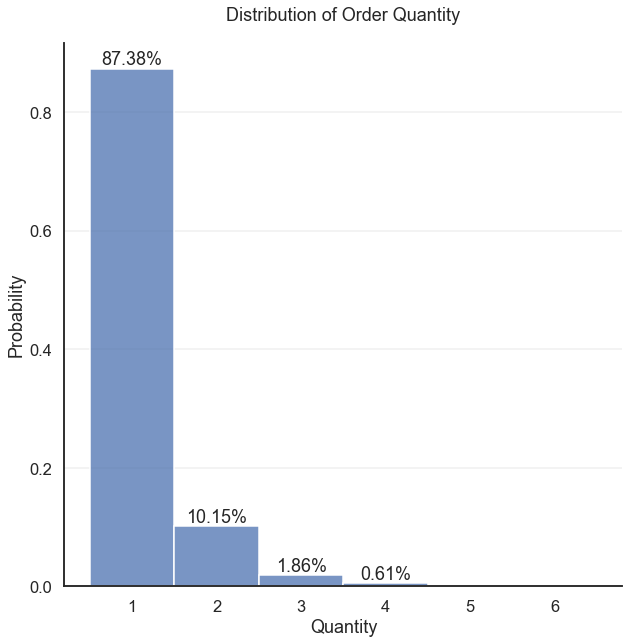

In [127]:
# create list for annaotattion
freq, bin_edges = np.histogram(rt_df['Quantity'], bins = 4, range = (1,5))

# create a canvas
fig, ax0 = plt.subplots(figsize=(10,10))

# set the style and theme
sns.set_theme('talk')
sns.set_style('white')

# plot the graph
sns.histplot(data=rt_df,
             x='Quantity',
             stat='probability', # change the y-axis to probability to 1
             discrete = True, # places the bins on top of the xticks
             ax = ax0
            )

# annotate the bar with the values
for i, x in enumerate(freq/freq.sum()):plt.text(i+1,x,f'{x*100:0.2f}%',ha='center',va='bottom')

# label the plot
sns.despine()
plt.title('Distribution of Order Quantity',y=1.03)
plt.grid(axis='y',alpha=0.3)

#plt.savefig('RTH_Quan_Dist.png',dpi=600,bbox_inches='tight')
plt.show()

### Number of Road Tax Holder Sold by Brand

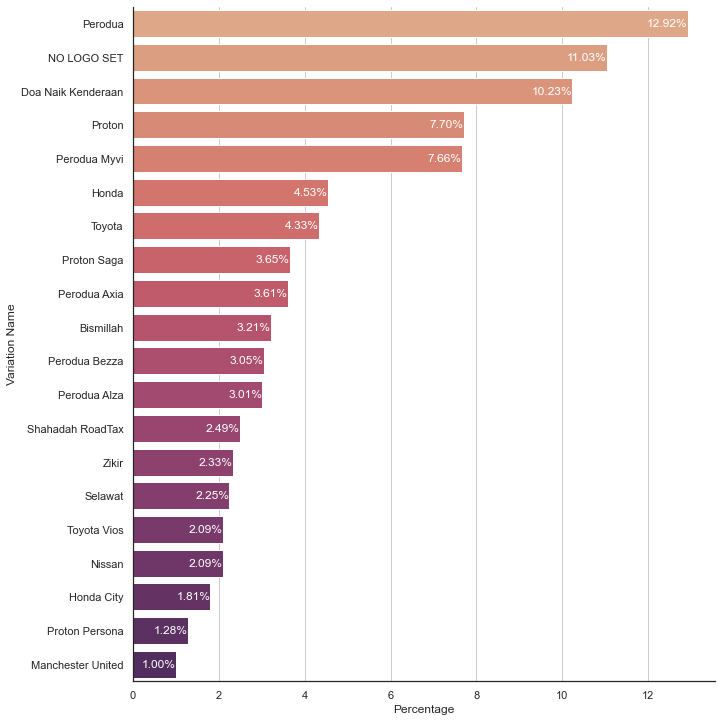

In [162]:
sns.set_theme('notebook')
sns.set_style('white')

# create a df for the bar plot
rt_df = order_list.filter(like='Road Tax',axis=0).reset_index()
rth_df = rt_df.groupby('Variation Name',as_index=False)[['Quantity']].sum().sort_values('Quantity',ascending=False).reset_index(drop=True)
rth_df['Percentage'] = (rth_df['Quantity']/(rth_df['Quantity'].sum()))*100

# plot the graph
ax0 = sns.catplot(data = rth_df.head(20), 
                  x='Percentage' ,
                  y = 'Variation Name',
                  kind='bar', 
                  palette = 'flare',
                  height=10)

# label each bar in plot
for i, x in enumerate(rth_df['Percentage'].head(20)):plt.text(x,i,f'{x:.2f}%',va='center',ha='right',color='white')

# label the plot
#plt.title('Percentage of Road Tax Holder Sold Between [2021-11-30] & [2021-12-30]',y=1.03)
plt.grid(axis='x')

#plt.savefig('B30_RTH_BY_VAR.png',dpi=600,bbox_inches='tight')
plt.show()

## Machine Learning

### Clustering or How I Learn to Segment the Customers

With the failure to establish any meaningful independent variable data to create a regression model we will now move on to clustering using DBScan to determine if there is any meaningful number of clusters within the list of customers to be segmented.

In [2]:
# import the model library
from sklearn.cluster import DBSCAN
# import the normalizing object
from sklearn.preprocessing import StandardScaler

In [3]:
#import the dataset and clean it
cdf = pd.read_excel('Data.xlsx')
# drop all empty columns
cdf.dropna(how='all',axis=1,inplace=True)
# fix entry error
cdf.loc[3871,'State/Province'] = 'Negeri Sembilan'
# select data for clustering
cdf = cdf.iloc[:,[0,2,3,9]]
# preview data
cdf.head()

,Name,Total Orders,Total Spend,State/Province
0,schy_keyn,3,42.37,Terengganu
1,sharifahnurazianti,3,56.50,Johor
2,sugandesh,2,28.89,Kuala Lumpur
3,iyqahloy,2,90.90,Sabah
4,cteynoor,2,59.73,Sarawak


In [147]:
# create X variable
X =cdf.loc[:,['Total Orders','Total Spend']]
# normalize variable X
X = StandardScaler().fit_transform(X)
# create and fit clustering model
dbscan = DBSCAN(eps=0.5,min_samples=5).fit(X)
# extract the cluster classification labels
cdf['Class'] = dbscan.labels_
# preview data
cdf.head()

,Name,Total Orders,Total Spend,State/Province,Class
0,schy_keyn,3,42.37,Terengganu,0
1,sharifahnurazianti,3,56.50,Johor,0
2,sugandesh,2,28.89,Kuala Lumpur,1
3,iyqahloy,2,90.90,Sabah,1
4,cteynoor,2,59.73,Sarawak,1


In [148]:
# Number of customers by class
cdf[['Class']].value_counts().sort_index()

Class
-1         29
 0         14
 1        122
 2       3741
 3          5
dtype: int64

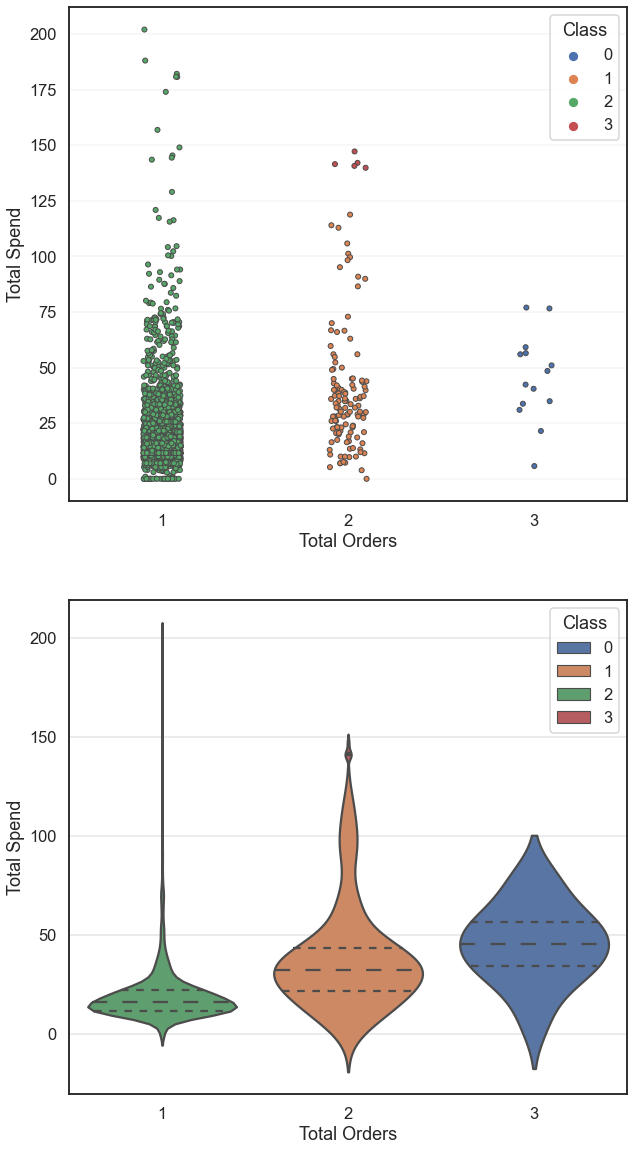

In [153]:
# visualize the clusters formed by DBSCAN 
# create the canvas
fig, (ax0,ax1) = plt.subplots(nrows=2,figsize=(10,20))

# convert the class column to object
cdf['Class'] = cdf['Class'].astype('str')

# set the plot style
sns.set_theme('talk')
sns.set_style('white')

# plot the scatter graph
sns.stripplot(data=cdf[cdf['Class'] != '-1'], # remove outliers
                y='Total Spend',
                x='Total Orders',
                hue='Class',
              linewidth = 1,
               # s = 300, # marker size
            #    marker = r'o', # marker type
              #  alpha = 0.5, 
                ax=ax0)

# plot the violin graph
sns.violinplot(data=cdf[cdf['Class'] != '-1'], # remove outliers
                y='Total Spend',
                x='Total Orders',
                hue='Class',
                dodge = False,
                scale = "count",
                inner = 'quartile',
                ax=ax1)

# label the plots
#ax0.set_title('Strip Plot for LaserCutMalaysia Customer Segmentation',y=1.03)
#ax1.set_title('Violin Plot for LaserCutMalaysia Customer Segmentation',y=1.03)
ax0.grid(axis='y',alpha=0.2)
ax1.grid(axis='y',alpha=0.5)

plt.savefig('Cust_Seg.png',dpi=600,bbox_inches='tight')
plt.show()

Using DBSCAN ML algorithm, it was able to determine 4 different groups of customers based on the number of orders and the total amount of money spend on the orders.

| Class|Number of Customers| Customer Attribute Based on Cluster Created|
|------|:-----------------:|---------|
|0     | 14| Multiple-repeat customers with high spending habits|
|1|122|Returning customers with medium to high spending habits|
|2|3741|Non-repeating customers with low spending habits|
|3|5|Returning customers with very high spending habits|